In [5]:
# To use the package locally, add the C2QA repository's root folder to the path prior to importing c2qa.
import os
import sys


module_path = os.path.abspath(os.path.join("../.."))
if module_path not in sys.path:
    sys.path.append(module_path)

# Import packages that will be used
import c2qa
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
from IPython.display import HTML

import qiskit.visualization
from matplotlib import pyplot as plt


import latex

So this is the full run through of showing the power of bosonic error correction via cat state encoding. For most circuit QED systems, the average photon lifetime can be set to 1 photon per millisecond, which is a Q of about 10^6 (standard, Vrajitorea). Suppose we first encode a logical state in normal Fock states.

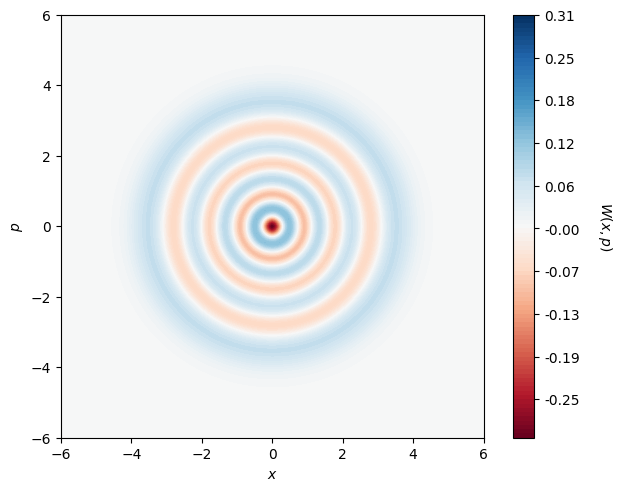

/Users/juanfe/PycharmProjects/pythonProject2/bosonic-qiskit/c2qa/kraus.py:185: UserWarning: PhotonLossNoisePass ignores instructions without duration, you may need to schedule circuit in advance.
  warnings.warn(


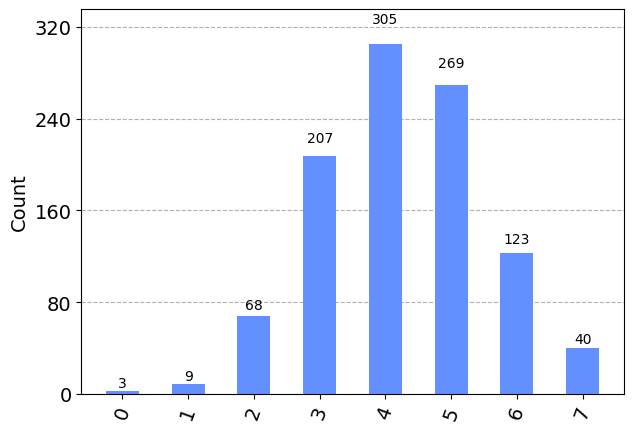

In [6]:
import latex

## Demonstration of amplitude damping circuit
# Define how many qumodes we want, and how many qubits we should use to represent each. Our basis will consist of Fock states |0> to |7>
num_qumodes = 1
num_qubits_per_qumode = 3 # The photon number which the Hilbert space truncates at is 2 ** num_qubits_per_qumode = 8

# Create circuit
qmr = c2qa.QumodeRegister(num_qumodes, num_qubits_per_qumode)
cr = qiskit.ClassicalRegister(num_qumodes * num_qubits_per_qumode)
circ = c2qa.CVCircuit(qmr, cr)

# To illustrate photon loss, first initialize the qumode in Fock state |7>
circ.cv_initialize(7, qmr[0])
#plot wigner function of original state
state, _, _ = c2qa.util.simulate(circ)
c2qa.wigner.plot_wigner(circ, state)

# Now apply a delay gate and specify gate duration and units
gate_duration = 1
time_unit = "ms"
circ.cv_delay(duration=gate_duration, qumode=qmr[0], unit=time_unit)

# Now set a loss rate -- make it large enough such that we can actually see the loss
photon_loss_rate = 0.5 # This is a loss rate in units of 1/ms
noise_pass = c2qa.kraus.PhotonLossNoisePass(photon_loss_rates=photon_loss_rate, circuit=circ, time_unit=time_unit)

# To see the loss, we can make a measurement on the qumode and visualise counts with a histogram
circ.cv_measure(qmr[0], cr)

# Use noise pass with simulate
_, _, counts = c2qa.util.simulate(circ, noise_passes=noise_pass)

# Visualise photon loss using a histogram
qiskit.visualization.plot_histogram(counts)

That was a normal Fock state, which decayed.

/Users/juanfe/PycharmProjects/pythonProject2/bosonic-qiskit/c2qa/circuit.py:713: UserWarning: Probe qubits not in use, set probe_measure to True for measure support.
  warnings.warn(
/Users/juanfe/PycharmProjects/pythonProject2/.venv/lib/python3.12/site-packages/scipy/sparse/_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.flat[0])


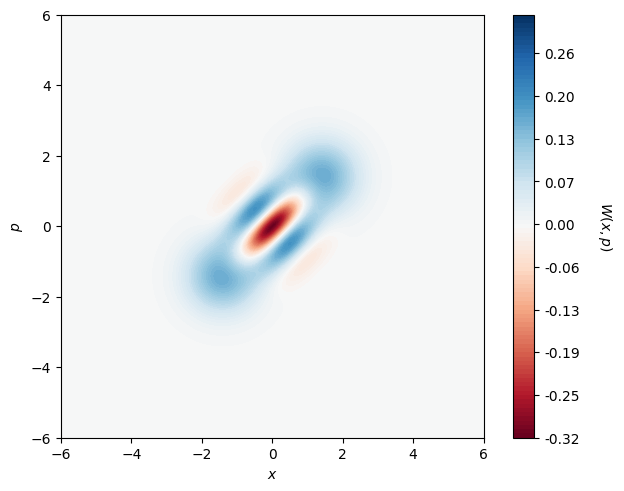

In [7]:
#EVEN cat state
#setup registers
qmr = c2qa.QumodeRegister(1, num_qubits_per_qumode = 6)
qbr = qiskit.QuantumRegister(1)
cr = qiskit.ClassicalRegister(1)
#The circuit is initalized to |0>|0> by default
circ = c2qa.CVCircuit(qmr, qbr, cr)
s=0.5
#put the qubit into a superposition and then execute a controlled displacement of the cavity
alpha = 1+1j
circ.h(qbr[0])
#circ.z(qbr[0])
circ.cv_c_d(alpha, qmr[0], qbr[0])
#circ.cv_sq(s, qmr[0])


#apply a rotation around an angle pi/4
theta = np.pi
circ.cv_r(theta, qmr[0])

#measure qubit in x basis to collapse into even or odd cat state
circ.measure_x(qbr, cr)
#The coherent state is displaced along the x axis by sqrt(2)*Re(λ),
#and on the y axis by sqrt(2)*Im(λ)
#state, _, _ = c2qa.util.simulate(circ,noise_passes=noise_pass)
state, _, _ = c2qa.util.simulate(circ)
c2qa.wigner.plot_wigner(circ, state)

Now we're going to initiate an ODD cat state

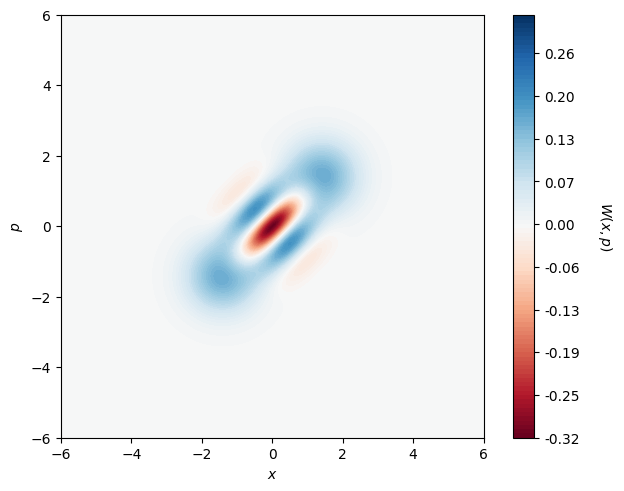

In [8]:
#setup an ODD cat state
#setup registers
qmr = c2qa.QumodeRegister(1, num_qubits_per_qumode = 6)
qbr = qiskit.QuantumRegister(1)
cr = qiskit.ClassicalRegister(1)
#The circuit is initalized to |0>|0> by default
circ = c2qa.CVCircuit(qmr, qbr, cr)
s=0.5
#put the qubit into a superposition and then execute a controlled displacement of the cavity
alpha = 1+1j
circ.h(qbr[0])
circ.z(qbr[0])
circ.cv_c_d(alpha, qmr[0], qbr[0])
#circ.cv_sq(s, qmr[0])


#apply a rotation around an angle pi/4
#theta = np.pi
#circ.cv_r(theta, qmr[0])

#measure qubit in x basis to collapse into even or odd cat state
circ.measure_x(qbr, cr)
#The coherent state is displaced along the x axis by sqrt(2)*Re(λ),
#and on the y axis by sqrt(2)*Im(λ)
#state, _, _ = c2qa.util.simulate(circ,noise_passes=noise_pass)
state, _, _ = c2qa.util.simulate(circ)
c2qa.wigner.plot_wigner(circ, state)

Now we will introduce our Parity Measurement, which is a rotation of n*pi. for even cat states, the rotation should be 0 or 2 pi, leaving the state unchanged (eigenvalue of 1). For odd states, we should rotate 180 degrees, leaving us with a phase shift giving us and EVEN cat state. So, both plots. should look the same. Do they?


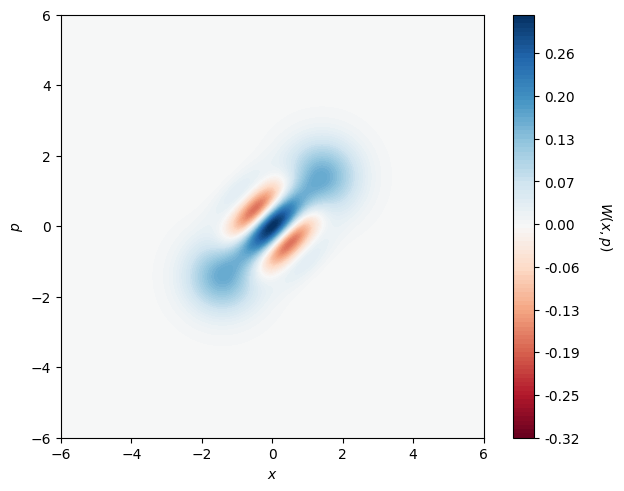

In [9]:
#setup an ODD cat state
#setup registers
qmr = c2qa.QumodeRegister(1, num_qubits_per_qumode = 6)
qbr = qiskit.QuantumRegister(1)
cr = qiskit.ClassicalRegister(1)
#The circuit is initalized to |0>|0> by default
circ = c2qa.CVCircuit(qmr, qbr, cr)
s=0.5
#put the qubit into a superposition and then execute a controlled displacement of the cavity
alpha = 1+1j
circ.h(qbr[0])
circ.z(qbr[0])
circ.cv_c_d(alpha, qmr[0], qbr[0])
#circ.cv_sq(s, qmr[0])


#apply a rotation around an angle pi/4
theta = np.pi
circ.cv_r(theta, qmr[0])

#measure qubit in x basis to collapse into even or odd cat state
circ.measure_x(qbr, cr)
#The coherent state is displaced along the x axis by sqrt(2)*Re(λ),
#and on the y axis by sqrt(2)*Im(λ)
#state, _, _ = c2qa.util.simulate(circ,noise_passes=noise_pass)
state, _, _ = c2qa.util.simulate(circ)
c2qa.wigner.plot_wigner(circ, state)

That was for Odd. Now even:

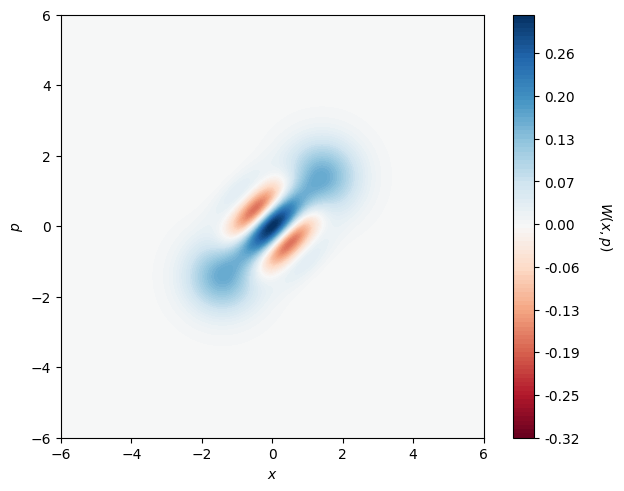

In [10]:
#setup an Even cat state
#setup registers
qmr = c2qa.QumodeRegister(1, num_qubits_per_qumode = 6)
qbr = qiskit.QuantumRegister(1)
cr = qiskit.ClassicalRegister(1)
#The circuit is initalized to |0>|0> by default
circ = c2qa.CVCircuit(qmr, qbr, cr)
s=0.5
#put the qubit into a superposition and then execute a controlled displacement of the cavity
alpha = 1+1j
circ.h(qbr[0])
circ.cv_c_d(alpha, qmr[0], qbr[0])
#circ.cv_sq(s, qmr[0])


#apply a rotation around an angle pi/4
theta = np.pi
circ.cv_r(theta, qmr[0])

#measure qubit in x basis to collapse into even or odd cat state
circ.measure_x(qbr, cr)
#The coherent state is displaced along the x axis by sqrt(2)*Re(λ),
#and on the y axis by sqrt(2)*Im(λ)
#state, _, _ = c2qa.util.simulate(circ,noise_passes=noise_pass)
state, _, _ = c2qa.util.simulate(circ)
c2qa.wigner.plot_wigner(circ, state)

As we see, we were right. The rotation operator phase shifts the odd cat state but now even, This means we can use an ancillary to push the shift to a qubit, giving us non-destructive feedback.